In [1]:
import pandas as pd
import numpy as np

In [2]:
File_to_work_with = '../Data/Proposed_structures_with_AI_caffeine_tanimoto_similarity_.xlsx'

In [3]:
initial = pd.read_excel(File_to_work_with)

In [4]:
initial.head()

,Unnamed: 0,new_SMILES,CID,PUBCHEM_SMILES,CN(C(N1C)=O)C2=C(N(C)C(SCCC)=N2)C1=O,CN(C(N1C)=O)C2=C(N(C)C(NCCCCCCN)=N2)C1=O,O=C1C2=C(N=C(NCCCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O,CN(C(C(N(C)C(NCCCNCCCNCCCN)=N1)=C1N2C)=O)C2=O,O=C1C2=C(N=C(NCCCCN3C(C(C=CC=C4)=C4C3=O)=O)N2C)N(C)C(N1C)=O,O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CCCCCN=[N+]=[N-])N=N5)N2C)N(C)C(N1C)=O,...,CN(C(C(N(C)C(NCCCCNCCCN)=N1)=C1N2C)=O)C2=O,CN(C(N1C)=O)C2=C(N(C)C(SC(N3CCCC3)=S)=N2)C1=O,O=C1C2=C(N=C(NCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O,CN(C(N1C)=O)C2=C(N(C)C(SCC(C)(C)C)=N2)C1=O,O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=C(CN=[N+]=[N-])C=CC=C6)N=N5)N2C)N(C)C(N1C)=O,O=C1C2=C(N=C(NCCCCN3C(C=CC3=O)=O)N2C)N(C)C(N1C)=O,CN(C(N1C)=O)C2=C(N(C)C=N2)C1=O,O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CCCN=[N+]=[N-])N=N5)N2C)N(C)C(N1C)=O,CN(C(N1C)=O)C2=C(N(C)C(NCCCN)=N2)C1=O,CN1C(NCC/N=C2SCC(N/2)=O)=NC3=C1C(N(C)C(N3C)=O)=O
0,0,Cn1c(NCCCN=C2NC(=O)CS2)nc2c1n(C)c(=O)n2C,0,0,0.402496,0.537808,0.532088,0.548085,0.493402,0.399220,...,0.541455,0.414381,0.528226,0.404965,0.392745,0.528045,0.404484,0.401307,0.547170,0.605705
1,1,CN1CN=C(NCCCN=C2NC(=O)CS2)N(C)CN(C)C1=O,0,0,0.172633,0.180302,0.196018,0.187450,0.206338,0.193991,...,0.185127,0.187406,0.201070,0.172713,0.200631,0.194717,0.153203,0.194226,0.179283,0.256917
2,2,Cn1c(SC(=S)N2CCCC2)nc2c1n(C)c(=O)n2C=O,0,0,0.504092,0.418712,0.427724,0.418002,0.410048,0.442105,...,0.421374,0.616598,0.423841,0.502435,0.436629,0.424287,0.403846,0.437788,0.414110,0.407781
3,3,CN1Cc2c(n(C)c(=O)n(C)c2=O)C1NCC=CCCCN=N,0,0,0.428003,0.428383,0.447028,0.431489,0.479579,0.491667,...,0.430638,0.447217,0.447233,0.431878,0.497100,0.453085,0.378320,0.486905,0.427249,0.444586
4,4,CCN(C=O)C(=O)C=CN=C(NCCCN=C1NC(=O)CS1)N(C)C,0,0,0.160032,0.169781,0.191824,0.176136,0.194126,0.194370,...,0.174757,0.182168,0.198899,0.162097,0.198838,0.206436,0.146692,0.193809,0.169657,0.248181


In [5]:
initial = initial.columns.values.tolist()

In [6]:
initial

['Unnamed: 0',
 'new_SMILES',
 'CID',
 'PUBCHEM_SMILES',
 'CN(C(N1C)=O)C2=C(N(C)C(SCCC)=N2)C1=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCCCN)=N2)C1=O',
 'O=C1C2=C(N=C(NCCCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O',
 'CN(C(C(N(C)C(NCCCNCCCNCCCN)=N1)=C1N2C)=O)C2=O',
 'O=C1C2=C(N=C(NCCCCN3C(C(C=CC=C4)=C4C3=O)=O)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CCCCCN=[N+]=[N-])N=N5)N2C)N(C)C(N1C)=O',
 'CN(C(C(N(C)C(NCCCNCCCN)=N1)=C1N2C)=O)C2=O',
 'CNCCN(C)C1=NC2=C(N(C(N(C2=O)C)=O)C)N1C',
 'CN(C(N1C)=O)C2=C(N(C)C(SC)=N2)C1=O',
 'O=C1C2=C(N=C(NCCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCCN)=N2)C1=O',
 'CN1C(N(C)CCCN(C=C(/C=C(C(OC)=O)\\S)[N+]([O-])=O)C)=NC2=C1C(N(C)C(N2C)=O)=O',
 'CN(C(C(N(C)C(NCCNCCCNCCN)=N1)=C1N2C)=O)C2=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=CC=CC(CN=[N+]=[N-])=C6)N=N5)N2C)N(C)C(N1C)=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCN)=N2)C1=O',
 'O=C1C2=C(N=C(NCCN3C(C(C=CC=C4)=C4C3=O)=O)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=CC=C(CN=[N+]

In [7]:
initial = initial[4:]

In [8]:
initial

['CN(C(N1C)=O)C2=C(N(C)C(SCCC)=N2)C1=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCCCN)=N2)C1=O',
 'O=C1C2=C(N=C(NCCCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O',
 'CN(C(C(N(C)C(NCCCNCCCNCCCN)=N1)=C1N2C)=O)C2=O',
 'O=C1C2=C(N=C(NCCCCN3C(C(C=CC=C4)=C4C3=O)=O)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CCCCCN=[N+]=[N-])N=N5)N2C)N(C)C(N1C)=O',
 'CN(C(C(N(C)C(NCCCNCCCN)=N1)=C1N2C)=O)C2=O',
 'CNCCN(C)C1=NC2=C(N(C(N(C2=O)C)=O)C)N1C',
 'CN(C(N1C)=O)C2=C(N(C)C(SC)=N2)C1=O',
 'O=C1C2=C(N=C(NCCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCCN)=N2)C1=O',
 'CN1C(N(C)CCCN(C=C(/C=C(C(OC)=O)\\S)[N+]([O-])=O)C)=NC2=C1C(N(C)C(N2C)=O)=O',
 'CN(C(C(N(C)C(NCCNCCCNCCN)=N1)=C1N2C)=O)C2=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=CC=CC(CN=[N+]=[N-])=C6)N=N5)N2C)N(C)C(N1C)=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCN)=N2)C1=O',
 'O=C1C2=C(N=C(NCCN3C(C(C=CC=C4)=C4C3=O)=O)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=CC=C(CN=[N+]=[N-])C=C6)N=N5)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(NCCN3C(

In [9]:
generated_smiles = pd.read_excel(File_to_work_with)

In [10]:
generated_smiles = generated_smiles['new_SMILES']

In [11]:
generated_smiles

0         Cn1c(NCCCN=C2NC(=O)CS2)nc2c1n(C)c(=O)n2C
1          CN1CN=C(NCCCN=C2NC(=O)CS2)N(C)CN(C)C1=O
2           Cn1c(SC(=S)N2CCCC2)nc2c1n(C)c(=O)n2C=O
3          CN1Cc2c(n(C)c(=O)n(C)c2=O)C1NCC=CCCCN=N
4      CCN(C=O)C(=O)C=CN=C(NCCCN=C1NC(=O)CS1)N(C)C
                          ...                     
341                     CN1CC2NCC=CC3=NC3(C1=O)N2C
342           CC1N(C)C(=O)N(C=O)CN2CC12NCC=CCCCN=N
343          CN1CN2C=C(C1=O)N(C=O)C(NCCCCNCCCN)=N2
344      CON1c2nc(NCCCNCCCNCCCN)[nH]c2C(=O)N(C)C1C
345       CON1C=C2NC(NCCCNCCCNCCCN)=NC1(C)N(C)C2=O
Name: new_SMILES, Length: 346, dtype: object

## Molecular descriptors to be used

In [12]:
from rdkit import Chem
from mordred import Calculator, descriptors, Lipinski
import mordred

In [13]:
descriptor1_initials = []
descriptor1_generated = []

descriptor2_initials = []
descriptor2_generated = []

descriptor3_initials = []
descriptor3_generated = []


In [14]:
mol_objs_ini = [Chem.MolFromSmiles(smi) for smi in initial]
mol_objs_gen = [Chem.MolFromSmiles(smi) for smi in generated_smiles]

In [15]:
calc = Calculator(descriptors, ignore_3D=True)
molecular_descriptors_initials = calc.pandas(mol_objs_ini)
molecular_descriptors_generated = calc.pandas(mol_objs_gen)

100%|████████████████████████████████████████████████████████████████████████████████| 346/346 [00:04<00:00, 73.77it/s]


In [16]:
molecular_descriptors_initials.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,13.658457,12.537408,0,0,22.669196,2.535529,4.964037,22.669196,1.259400,3.816969,...,9.986863,65.798368,268.099397,7.885276,568,32,94.0,115.0,7.888889,4.055556
1,16.486884,14.111207,0,1,27.746837,2.535628,4.964140,27.746837,1.261220,3.999750,...,10.032189,70.352988,308.196074,6.699915,1166,36,110.0,131.0,8.888889,5.055556
2,20.160317,16.996015,0,0,33.109109,2.535656,4.964170,33.109109,1.273427,4.189094,...,10.274603,77.368494,362.170253,7.545214,1892,44,138.0,167.0,10.222222,5.694444
3,20.022418,15.824963,0,3,34.031117,2.535628,4.964140,34.031117,1.260412,4.189389,...,10.086101,75.956798,380.264822,6.445166,2416,41,130.0,151.0,10.138889,6.305556
4,23.574531,18.765181,0,0,39.005624,2.535726,4.964239,39.005624,1.300187,4.344701,...,10.517510,82.685737,410.170253,7.887889,2810,55,164.0,202.0,10.944444,6.527778


In [17]:
molecular_descriptors_generated.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,17.941538,15.055799,0,2,29.379472,2.548000,4.763931,29.379472,1.277368,4.073424,...,10.043293,74.801912,337.132094,8.026955,1411,34,122.0,146.0,8.250000,5.027778
1,17.396191,14.095978,0,5,28.697174,2.314062,4.627688,28.697174,1.247703,4.035294,...,9.675897,70.002056,341.163394,7.416596,1427,33,112.0,126.0,8.527778,5.166667
2,16.377494,14.871227,0,0,26.773537,2.559616,4.811440,26.773537,1.274930,3.992977,...,10.073104,72.575136,325.066717,9.029631,916,34,114.0,140.0,7.750000,4.638889
3,17.193991,14.698177,0,2,28.912557,2.538260,4.972461,28.912557,1.257068,4.040669,...,10.048410,71.487918,320.196074,6.812682,1336,37,114.0,135.0,9.138889,5.305556
4,18.034348,15.639880,0,5,30.347189,2.240574,4.436851,30.347189,1.213888,4.084496,...,9.521568,71.720724,368.163060,7.513532,1955,30,112.0,122.0,9.916667,5.972222


In [18]:
def is_morder_missing(x):
    return np.nan if type(x) == mordred.error.Missing or type(x) == mordred.error.Error else x 

In [19]:
molecular_descriptors_initials = molecular_descriptors_initials.applymap(is_morder_missing)
molecular_descriptors_generated = molecular_descriptors_generated.applymap(is_morder_missing)

In [20]:
simple_preprocessing = True
if simple_preprocessing:
    molecular_descriptors_initials = molecular_descriptors_initials.dropna(axis=1, how='any')
    molecular_descriptors_generated = molecular_descriptors_generated.dropna(axis=1, how='any')

In [21]:
print(molecular_descriptors_initials.isna().sum().sum())
print(molecular_descriptors_generated.isna().sum().sum())
print(molecular_descriptors_initials.shape)
print(molecular_descriptors_generated.shape)

0
0
(58, 1388)
(346, 1375)


In [22]:
molecular_descriptors_initials = molecular_descriptors_initials.loc[:, (molecular_descriptors_initials != 0).any(axis=0)]
molecular_descriptors_generated = molecular_descriptors_generated.loc[:, (molecular_descriptors_generated != 0).any(axis=0)]

In [23]:
print(molecular_descriptors_initials.shape)
print(molecular_descriptors_generated.shape)

(58, 1137)
(346, 1219)


### Chosen descriptors:

-> "MW"

-> "Diameter"?

-> "SlogP"

-> "TopoPSA"

-> "WPol" -> the Wiener Polarity Number

-> "nRing" -> ring count

-> "AATS0Z" -> averaged moreau-broto autocorrelation of lag 0 weighted by atomic number

In [24]:
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

In [25]:
preserve_only_common_columns = []
for element in list(molecular_descriptors_initials.columns):
    if element in list(molecular_descriptors_generated.columns):
        preserve_only_common_columns.append(element)
    else:
        print("Not found in generated structures : ", element)

Not found in generated structures :  C4SP3
Not found in generated structures :  NaaS
Not found in generated structures :  SaaS
Not found in generated structures :  MAXsCH3
Not found in generated structures :  MAXaaaC
Not found in generated structures :  MAXaaN
Not found in generated structures :  MAXaasN
Not found in generated structures :  MINsCH3
Not found in generated structures :  MINaaaC
Not found in generated structures :  MINaaN
Not found in generated structures :  MINaasN
Not found in generated structures :  MDEC-11
Not found in generated structures :  MDEC-13
Not found in generated structures :  MDEC-33
Not found in generated structures :  MDEN-23
Not found in generated structures :  MDEN-33


In [26]:
len(preserve_only_common_columns)

1121

In [27]:
print(preserve_only_common_columns)

['ABC', 'ABCGG', 'nBase', 'SpAbs_A', 'SpMax_A', 'SpDiam_A', 'SpAD_A', 'SpMAD_A', 'LogEE_A', 'VE1_A', 'VE2_A', 'VE3_A', 'VR1_A', 'VR2_A', 'VR3_A', 'nAromAtom', 'nAromBond', 'nAtom', 'nHeavyAtom', 'nHetero', 'nH', 'nC', 'nN', 'nO', 'nS', 'ATS0dv', 'ATS1dv', 'ATS2dv', 'ATS3dv', 'ATS4dv', 'ATS5dv', 'ATS6dv', 'ATS7dv', 'ATS8dv', 'ATS0d', 'ATS1d', 'ATS2d', 'ATS3d', 'ATS4d', 'ATS5d', 'ATS6d', 'ATS7d', 'ATS8d', 'ATS0s', 'ATS1s', 'ATS2s', 'ATS3s', 'ATS4s', 'ATS5s', 'ATS6s', 'ATS7s', 'ATS8s', 'ATS0Z', 'ATS1Z', 'ATS2Z', 'ATS3Z', 'ATS4Z', 'ATS5Z', 'ATS6Z', 'ATS7Z', 'ATS8Z', 'ATS0m', 'ATS1m', 'ATS2m', 'ATS3m', 'ATS4m', 'ATS5m', 'ATS6m', 'ATS7m', 'ATS8m', 'ATS0v', 'ATS1v', 'ATS2v', 'ATS3v', 'ATS4v', 'ATS5v', 'ATS6v', 'ATS7v', 'ATS8v', 'ATS0se', 'ATS1se', 'ATS2se', 'ATS3se', 'ATS4se', 'ATS5se', 'ATS6se', 'ATS7se', 'ATS8se', 'ATS0pe', 'ATS1pe', 'ATS2pe', 'ATS3pe', 'ATS4pe', 'ATS5pe', 'ATS6pe', 'ATS7pe', 'ATS8pe', 'ATS0are', 'ATS1are', 'ATS2are', 'ATS3are', 'ATS4are', 'ATS5are', 'ATS6are', 'ATS7are', '

In [28]:
x1 = 'MW' #GATS3c
x2 = 'TopoPSA' #WPol
x3 = 'nRing' #AATS0Z

In [29]:
descriptor1 = 'GATS3c'#str(input('Please input your first descriptor : '))
descriptor2 = 'WPol'#str(input('Please input your second descriptor : '))
descriptor3 = 'AATS0Z'#str(input('Please input your third descriptor : '))

In [30]:
whole_set_descriptor1 = molecular_descriptors_initials[descriptor1].append(molecular_descriptors_generated[descriptor1])
whole_set_descriptor2 = molecular_descriptors_initials[descriptor2].append(molecular_descriptors_generated[descriptor2])
whole_set_descriptor3 = molecular_descriptors_initials[descriptor3].append(molecular_descriptors_generated[descriptor3])

C:\Users\aleks\AppData\Local\Temp\ipykernel_13028\1232241802.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_set_descriptor1 = molecular_descriptors_initials[descriptor1].append(molecular_descriptors_generated[descriptor1])
C:\Users\aleks\AppData\Local\Temp\ipykernel_13028\1232241802.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_set_descriptor2 = molecular_descriptors_initials[descriptor2].append(molecular_descriptors_generated[descriptor2])
C:\Users\aleks\AppData\Local\Temp\ipykernel_13028\1232241802.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_set_descriptor3 = molecular_descriptors_initials[descriptor3].append(molecular_descriptors_generated[descriptor3])


In [31]:
print(len(whole_set_descriptor1))
print(len(whole_set_descriptor2))
len(whole_set_descriptor3)

404
404


404

In [32]:
print(whole_set_descriptor1.min(), whole_set_descriptor1.max())
print(whole_set_descriptor2.min(), whole_set_descriptor2.max())
print(whole_set_descriptor3.min(), whole_set_descriptor3.max())

0.6873307827108941 1.5473504807951999
13 71
15.620689655172415 41.916666666666664


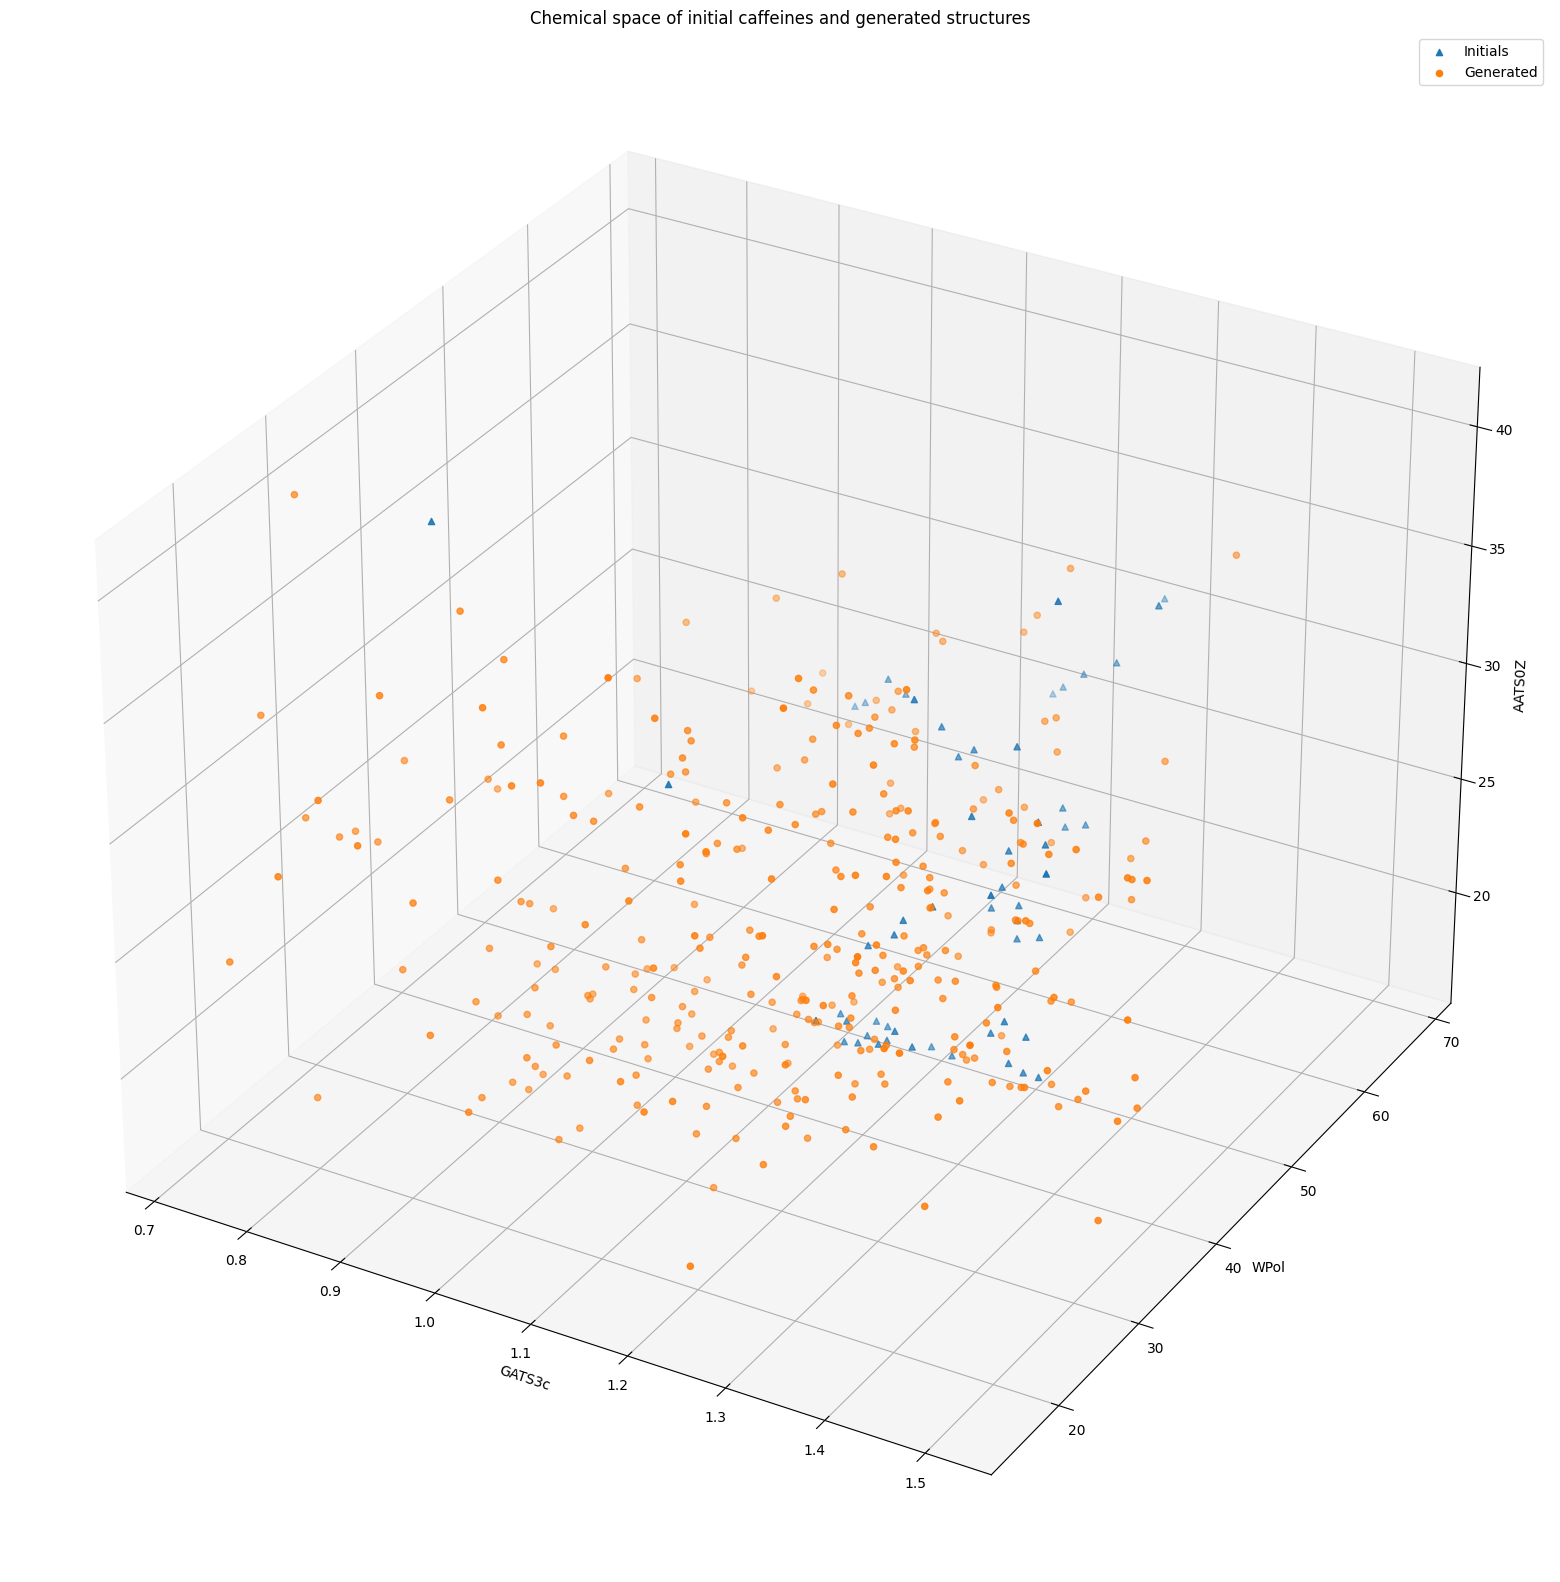

In [33]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')

ax.scatter(molecular_descriptors_initials[descriptor1], molecular_descriptors_initials[descriptor2], molecular_descriptors_initials[descriptor3], marker='^')
ax.scatter(molecular_descriptors_generated[descriptor1], molecular_descriptors_generated[descriptor2], molecular_descriptors_generated[descriptor3], marker='o')
ax.legend(['Initials', 'Generated'])
ax.set_title('Chemical space of initial caffeines and generated structures')
ax.set_xlabel(descriptor1)
ax.set_ylabel(descriptor2)
ax.set_zlabel(descriptor3)
plt.xlim([whole_set_descriptor1.min(), whole_set_descriptor1.max()])
plt.ylim([whole_set_descriptor2.min(), whole_set_descriptor2.max()])
ax.set_zlim([whole_set_descriptor3.min(), whole_set_descriptor3.max()])
plt.show()

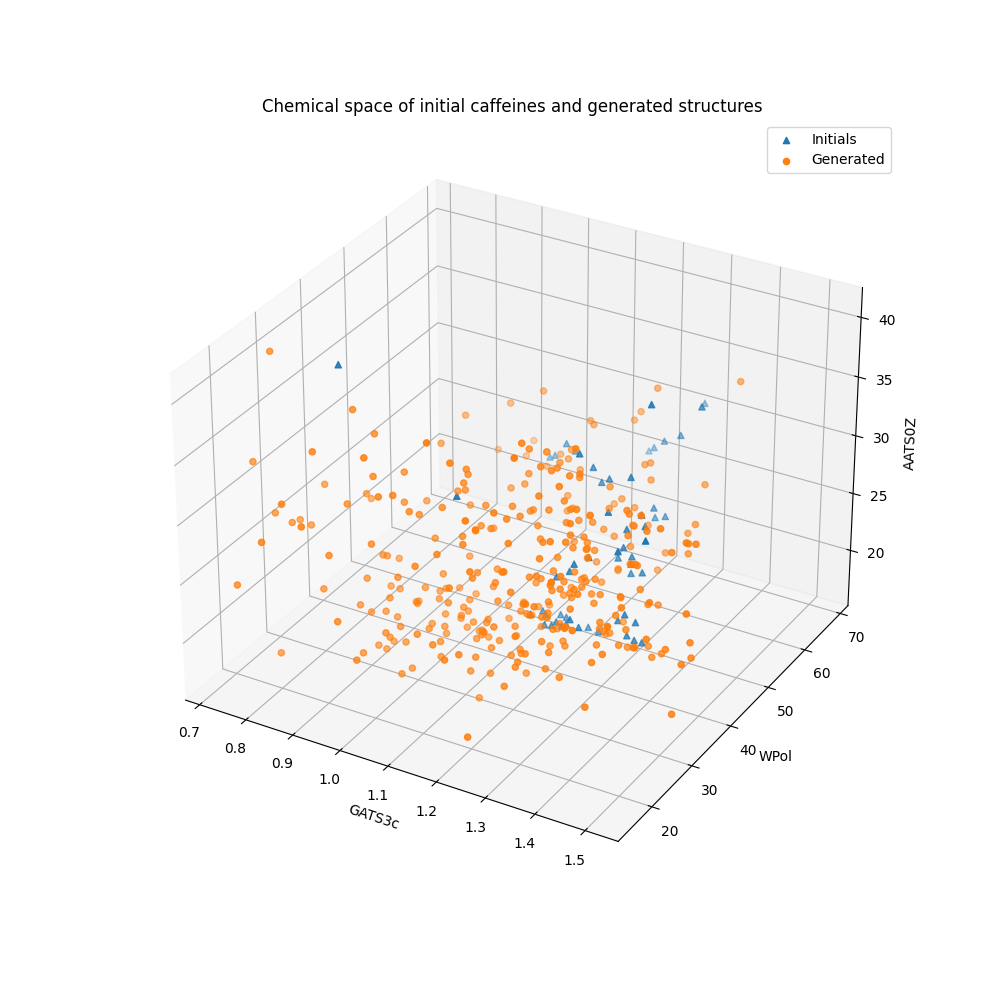

In [34]:
#%matplotlib
%matplotlib widget
#%matplotlib notebook
fig2 = plt.figure(figsize=(10, 10))
ax = fig2.add_subplot(projection='3d')

ax.scatter(molecular_descriptors_initials[descriptor1], molecular_descriptors_initials[descriptor2], molecular_descriptors_initials[descriptor3], marker='^')
ax.scatter(molecular_descriptors_generated[descriptor1], molecular_descriptors_generated[descriptor2], molecular_descriptors_generated[descriptor3], marker='o')
ax.legend(['Initials', 'Generated'])
ax.set_title('Chemical space of initial caffeines and generated structures')
ax.set_xlabel(descriptor1)
ax.set_ylabel(descriptor2)
ax.set_zlabel(descriptor3)
plt.xlim([whole_set_descriptor1.min(), whole_set_descriptor1.max()])
plt.ylim([whole_set_descriptor2.min(), whole_set_descriptor2.max()])
ax.set_zlim([whole_set_descriptor3.min(), whole_set_descriptor3.max()])

#plt.show()
plt.ion()
plt.savefig("Caffeine_chemical_space.svg")
#plt.savefig("Indole_chemical_space.pdf")

In [35]:
## creation of 3D graphs in *svg format for each azimuth
create_pictures_to_movie = 0
if create_pictures_to_movie == 1:
    for ii in range(0,360,1):
        ax.view_init(elev=10., azim=ii)
        plt.savefig("chemical_space/movie%d.svg" % ii)
else:
    pass

## Save used descriptors to excel file

In [36]:
initial_strcutures = pd.DataFrame(data=molecular_descriptors_initials[descriptor1], columns=[descriptor1])

In [37]:
initial_strcutures.head()

,GATS3c
0,1.336647
1,1.213999
2,1.325659
3,1.217306
4,1.286367


In [38]:
initial_strcutures[descriptor2] = molecular_descriptors_initials[descriptor2]
initial_strcutures[descriptor3] = molecular_descriptors_initials[descriptor3]
initial_strcutures['smiles'] = initial

In [39]:
initial_strcutures.head()

,GATS3c,WPol,AATS0Z,smiles
0,1.336647,32,29.176471,CN(C(N1C)=O)C2=C(N(C)C(SCCC)=N2)C1=O
1,1.213999,36,20.652174,CN(C(N1C)=O)C2=C(N(C)C(NCCCCCCN)=N2)C1=O
2,1.325659,44,23.916667,O=C1C2=C(N=C(NCCCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O
3,1.217306,41,19.728814,CN(C(C(N(C)C(NCCCNCCCNCCCN)=N1)=C1N2C)=O)C2=O
4,1.286367,55,24.846154,O=C1C2=C(N=C(NCCCCN3C(C(C=CC=C4)=C4C3=O)=O)N2C...


In [40]:
initial_strcutures.to_excel('../Data/Initial_caffeine_mol_desc.xlsx')

In [41]:
generated_strcutures = pd.DataFrame(data=molecular_descriptors_generated[descriptor1], columns=[descriptor1])

In [42]:
generated_strcutures[descriptor2] = molecular_descriptors_generated[descriptor2]
generated_strcutures[descriptor3] = molecular_descriptors_generated[descriptor3]
generated_strcutures['smiles'] = generated_smiles

In [43]:
generated_strcutures.head()

,GATS3c,WPol,AATS0Z,smiles
0,1.413760,34,28.904762,Cn1c(NCCCN=C2NC(=O)CS2)nc2c1n(C)c(=O)n2C
1,1.451016,33,26.478261,CN1CN=C(NCCCN=C2NC(=O)CS2)N(C)CN(C)C1=O
2,1.292282,34,37.000000,Cn1c(SC(=S)N2CCCC2)nc2c1n(C)c(=O)n2C=O
3,1.130116,37,20.978723,CN1Cc2c(n(C)c(=O)n(C)c2=O)C1NCC=CCCCN=N
4,1.331220,30,26.653061,CCN(C=O)C(=O)C=CN=C(NCCCN=C1NC(=O)CS1)N(C)C


In [44]:
generated_strcutures.to_excel('../Data/generated_caffeines.xlsx')

## Choose the generated structures that are the most similar to the initial structure

In [45]:
def takeClosest(descriptor_1, descriptor_1_collection, descriptor_2, descriptor_2_collection, descriptor_3, descriptor_3_collection):
    average_picked = (descriptor_1+descriptor_2+descriptor_3)/3
    val = range(len(generated_strcutures[descriptor1]))
    dfc = pd.DataFrame(data=val, columns=['Number'])
    val_ = []
    for i in range(len(descriptor_1_collection)):
        average_ = (descriptor_1_collection[i]+descriptor_2_collection[i]+descriptor_3_collection[i])/3
        val_.append(average_)
    dfc['Average'] = val_
    
    closest_val = min(dfc['Average'], key=lambda x:abs(x-average_picked))
    
    closest_value_df =  dfc.loc[(dfc['Average'] == closest_val)]
    
    dfc = dfc.loc[dfc['Average'] != closest_val]
    
    closest_val_ = min(dfc['Average'], key=lambda x:abs(x-average_picked))
    
    closest_value_df_ =  dfc.loc[(dfc['Average'] == closest_val_)]
    
    dfc = dfc.loc[dfc['Average'] != closest_val_]
    
    closest_val__ = min(dfc['Average'], key=lambda x:abs(x-average_picked))
    
    closest_value_df__ =  dfc.loc[(dfc['Average'] == closest_val__)]
    
    closest_value_df_combined = pd.concat([closest_value_df, closest_value_df_, closest_value_df__], ignore_index=True)
    
    return closest_value_df_combined

In [46]:
selected_structure_ = int(input("Please write down the integer from 0 to 57 down here: ")) #37
descriptor_1_picked = molecular_descriptors_initials[descriptor1][selected_structure_]
descriptor_2_picked = molecular_descriptors_initials[descriptor2][selected_structure_]
descriptor_3_picked = molecular_descriptors_initials[descriptor3][selected_structure_]

Please write down the integer from 0 to 57 down here: 37


In [47]:
numbers_of_structures = takeClosest(descriptor_1_picked, molecular_descriptors_generated[descriptor1],
                                   descriptor_2_picked, molecular_descriptors_generated[descriptor2],
                                   descriptor_3_picked, molecular_descriptors_generated[descriptor3])

In [48]:
numbers_of_structures

,Number,Average
0,142,19.415696
1,95,19.397794
2,251,19.428610


In [49]:
numbers_of_structures["Number"][0]

142

In [50]:
picked_average = (descriptor_1_picked+descriptor_2_picked+descriptor_3_picked)/3
picked_average

19.408320006318846

In [51]:
descriptor_1_cloeset = molecular_descriptors_generated[descriptor1][numbers_of_structures['Number'][0:]]
descriptor_2_closest = molecular_descriptors_generated[descriptor2][numbers_of_structures['Number'][0:]]
descriptor_3_closed = molecular_descriptors_generated[descriptor3][numbers_of_structures['Number'][0:]]

In [52]:
print('PICKED descriptors:')
print(descriptor_1_picked)
print(descriptor_2_picked)
print(descriptor_3_picked)
print('Closest descriptors:')
print(descriptor_1_cloeset)
print(descriptor_2_closest)
print(descriptor_3_closed)

PICKED descriptors:
1.2249600189565386
35
22.0
Closest descriptors:
142    1.247089
95     0.860049
251    1.019162
Name: GATS3c, dtype: float64
142    33
95     22
251    34
Name: WPol, dtype: int64
142    24.000000
95     35.333333
251    23.266667
Name: AATS0Z, dtype: float64


In [53]:
picked_structure = initial_strcutures.loc[(initial_strcutures[descriptor1] == descriptor_1_picked) & (initial_strcutures[descriptor2] == descriptor_2_picked) & (initial_strcutures[descriptor3] == descriptor_3_picked)]

In [54]:
picked_structure

,GATS3c,WPol,AATS0Z,smiles
37,1.22496,35,22.0,CN(C(C(N(C)C(NCCNCCN)=N1)=C1N2C)=O)C2=O


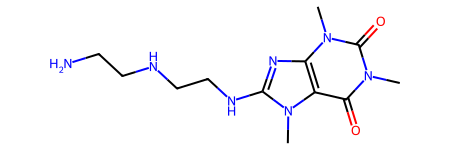

In [55]:
Chem.MolFromSmiles(picked_structure['smiles'][selected_structure_])

In [56]:
descriptor_1_cloeset[numbers_of_structures["Number"][0]]

1.2470887417731493

In [57]:
closest_gen_stru = pd.DataFrame()
for ithem in range(len(descriptor_1_cloeset)):
    df_res = generated_strcutures.loc[(generated_strcutures[descriptor1] == descriptor_1_cloeset[numbers_of_structures["Number"][ithem]]) 
                                            & (generated_strcutures[descriptor2] == descriptor_2_closest[numbers_of_structures["Number"][ithem]]) 
                                            & (generated_strcutures[descriptor3] == descriptor_3_closed[numbers_of_structures["Number"][ithem]])]
    closest_gen_stru=closest_gen_stru.append(df_res)

C:\Users\aleks\AppData\Local\Temp\ipykernel_13028\2947859290.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_gen_stru=closest_gen_stru.append(df_res)
C:\Users\aleks\AppData\Local\Temp\ipykernel_13028\2947859290.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_gen_stru=closest_gen_stru.append(df_res)
C:\Users\aleks\AppData\Local\Temp\ipykernel_13028\2947859290.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_gen_stru=closest_gen_stru.append(df_res)


In [58]:
closest_gen_stru

,GATS3c,WPol,AATS0Z,smiles
142,1.247089,33,24.000000,CN(CNC=NC=CC=O)c1c(N)n(C)c(=O)n(C)c1=O
95,0.860049,22,35.333333,CNC(=S)N(S)c1ncn(C)c1N(C)C
251,1.019162,34,23.266667,CN1C2=C3N(C=O)C1C(C=O)(N(C)C2)N3C


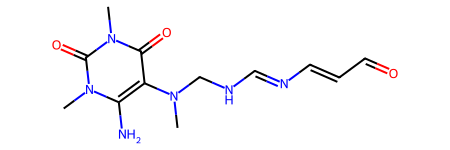

In [59]:
Chem.MolFromSmiles(closest_gen_stru['smiles'][int(numbers_of_structures['Number'][0])])

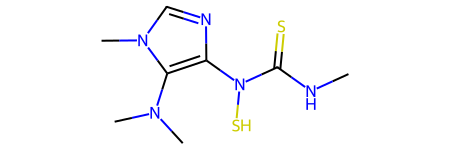

In [60]:
Chem.MolFromSmiles(closest_gen_stru['smiles'][int(numbers_of_structures['Number'][1])])

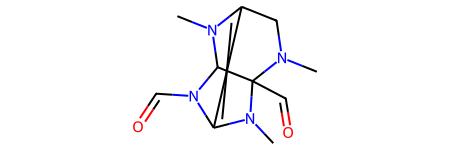

In [61]:
Chem.MolFromSmiles(closest_gen_stru['smiles'][int(numbers_of_structures['Number'][2])])

## Search within a box

In [62]:
center_of_a_box = [descriptor_1_picked, descriptor_2_picked, descriptor_3_picked]

In [63]:
size_of_a_box = [descriptor_1_picked/2, descriptor_2_picked/2, descriptor_3_picked/2]

In [64]:
def create_a_box_to_search_within(center_of_a_box, size_of_a_box):
    chemical_space_descriptor_1 = [center_of_a_box[0]-size_of_a_box[0], center_of_a_box[0]+size_of_a_box[0]]
    chemical_space_descriptor_2 = [center_of_a_box[1]-size_of_a_box[1], center_of_a_box[1]+size_of_a_box[1]]
    chemical_space_descriptor_3 = [center_of_a_box[2]-size_of_a_box[2], center_of_a_box[2]+size_of_a_box[2]]
    return chemical_space_descriptor_1, chemical_space_descriptor_2, chemical_space_descriptor_3

In [65]:
chemical_space_descriptor_1, chemical_space_descriptor_2, chemical_space_descriptor_3 = create_a_box_to_search_within(center_of_a_box, size_of_a_box) 

In [66]:
chemical_space_descriptor_1

[0.6124800094782693, 1.8374400284348078]

In [67]:
chemical_space_descriptor_2

[17.5, 52.5]

In [68]:
chemical_space_descriptor_3

[11.0, 33.0]

In [69]:
selected_structures = generated_strcutures.loc[(generated_strcutures[descriptor1] >= chemical_space_descriptor_1[0]) 
                                               & (generated_strcutures[descriptor1] <= chemical_space_descriptor_1[1]) 
                                               & (generated_strcutures[descriptor2] >= chemical_space_descriptor_2[0]) 
                                               & (generated_strcutures[descriptor2] <= chemical_space_descriptor_2[1]) 
                                               & (generated_strcutures[descriptor3] >= chemical_space_descriptor_3[0]) 
                                               & (generated_strcutures[descriptor3] >= chemical_space_descriptor_3[1])]

In [70]:
selected_structures

,GATS3c,WPol,AATS0Z,smiles
2,1.292282,34,37.000000,Cn1c(SC(=S)N2CCCC2)nc2c1n(C)c(=O)n2C=O
13,1.200641,32,37.000000,O=CCN1Cn2cc(nc2SC(=S)N2CCCC2)NC1=O
34,1.255528,37,33.463415,CC(Sc1nc2[nH]c(=O)n(C)c(=O)c2n1C)N1CCCCS1
63,1.016254,23,33.250000,CCSC1=NCCN(C)C(=S=O)CN1C
69,1.268025,38,33.463415,Cn1c(=O)c2c(nc(SCN3CCCCS3)n2C)n(C)c1=O
79,0.915196,30,35.105263,CN(C(=N)SC(=S)N1CCCC1)C1=CN(C=O)CNC1=O
81,0.879714,29,37.000000,CN(C(=N)SC(=S)N1CCCC1)C1=C2N(C=O)CN2C1=O
91,1.107206,26,36.068966,CSc1nc2c(n1C)N(C)CC(=S)N2C
92,1.096407,22,38.769231,CSc1nc2c(n1C)N(C)CN2C=S
93,1.182074,21,33.733333,CSC1=NCN(C=S)CN(C)CN1C


In [71]:
print("Picked initial structure: "+ str(descriptor1) + ' ' + str(descriptor_1_picked), str(descriptor2) + ' ' + str(descriptor_2_picked), str(descriptor3) + ' ' + str(descriptor_3_picked))

Picked initial structure: GATS3c 1.2249600189565386 WPol 35 AATS0Z 22.0


In [72]:
mols = [Chem.MolFromSmiles(smi) for smi in selected_structures['smiles']]

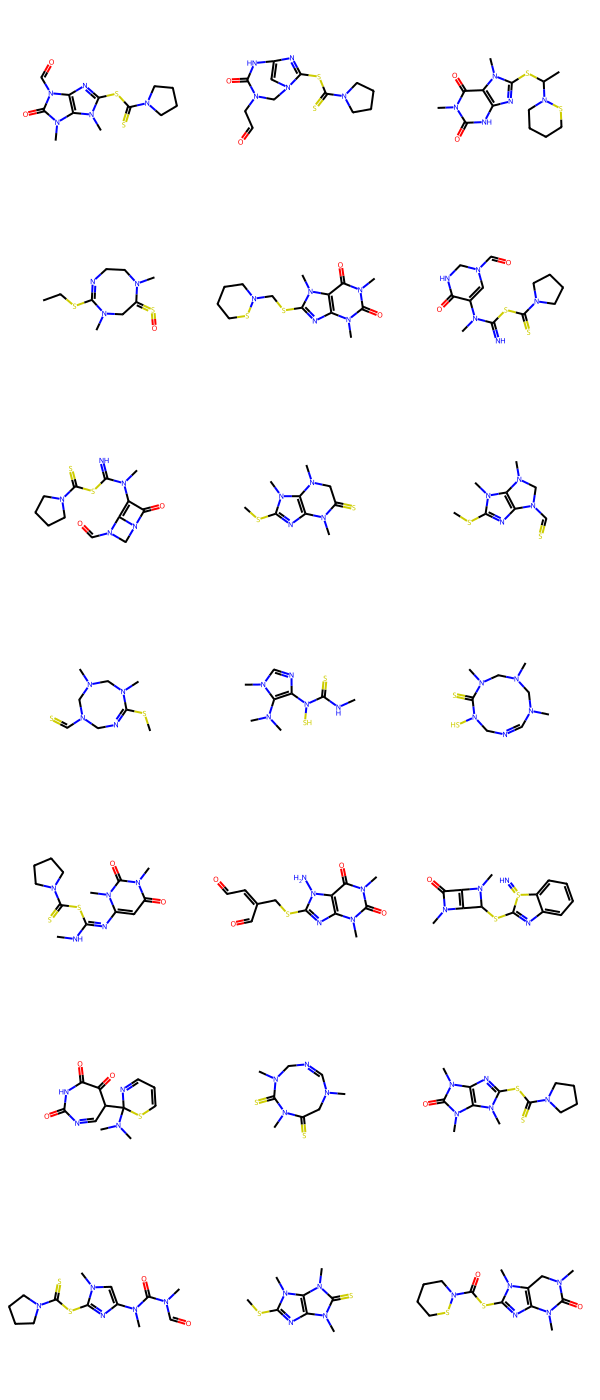

In [73]:
Chem.Draw.MolsToGridImage(mols)